# Linear regression

Consider a quadratic polynomial:  

$$ f(x) = \alpha_0 + \alpha_1 x + \alpha_2 x^2. $$



Here is a plot of this function:

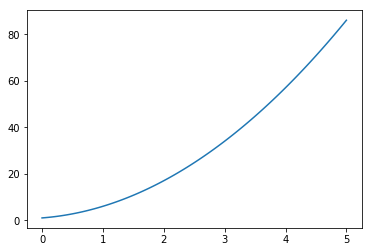

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 

def f(x): 
    alpha0 = 1; alpha1 = 2; alpha2 = 3
    return alpha0 + alpha1*x + alpha2*x**2

x_curve = np.linspace(0,5,100)
y_f = f(x_curve)
plt.plot(x_curve, y_f) 

Let's generate some random data that are scattered about this quadratic curve: 

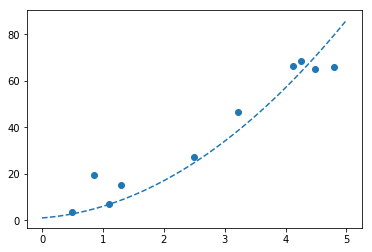

In [2]:
from helper_functions import generate_data

x_examples, y_examples = generate_data(f) 
plt.scatter(x_examples, y_examples) # plot data
plt.plot(x_curve, y_f, '--') # plot curve


# Quantifying the error between data and a curve

sum of squared errors for f =  576.1772872407922


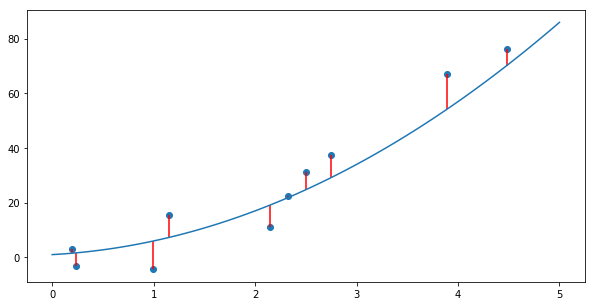

In [3]:
def compute_sum_of_squares(x_examples, y_examples, func, func_name):
    print 'sum of squared errors for', func_name, '= ', \
    np.sum((func(x_examples) - y_examples)**2)

def plot_data_and_curve_with_errors(): 
    plt.figure().set_size_inches(10,5)
    x_examples, y_examples = generate_data(f)
    plt.scatter(x_examples, y_examples) # data
    plt.plot(x_curve, y_f) # curve
    for x_example, y_example in zip(x_examples, y_examples):
        plt.vlines(x_example, f(x_example), y_example, colors='red') # vertical red lines
    compute_sum_of_squares(x_examples, y_examples, f, 'f')
    
plot_data_and_curve_with_errors() 

# Computing the best-fit quadratic polynomial

Parametrize a model $h(x)$ of the data by $\theta$, e.g. 

$$ h(x) = \theta_0 + \theta_1 x + \theta_2 x^2. $$



We wish to find the $\theta$ that minimizes the sum of squared errors between $h$ and the data points. 

## Computing the best-fit quadratic using `scikit-learn`

Install the package using the following command: 

```
conda install scikit-learn
```

Write a function to compute the parameters $\theta$ using `scikit-learn`: 

In [4]:
from sklearn import linear_model

def compute_theta_sklearn(x_examples, y_examples):
    model = linear_model.LinearRegression(fit_intercept=False)
    m = x_examples.shape[0]
    X = np.concatenate((np.ones((m,1)), x_examples, x_examples**2), axis=1) # design matrix
    model.fit(X, y_examples)
    return model.coef_.transpose()

# Model $h$ fails to capture actual function $f$ when number of data points is small

sum of squared errors for f =  315.7338899911412
sum of squared errors for h =  1.0009264380670503e-26


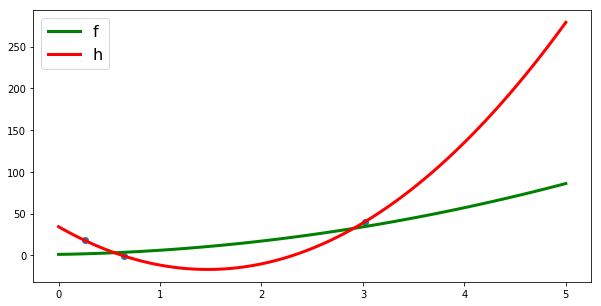

In [5]:
from helper_functions import plot_data_and_two_curves

plot_data_and_two_curves(f, compute_sum_of_squares, compute_theta=compute_theta_sklearn, n=3)

# $f$ is recovered when number of data points is large

sum of squared errors for f =  8090.651368990178
sum of squared errors for h =  7835.852526976491


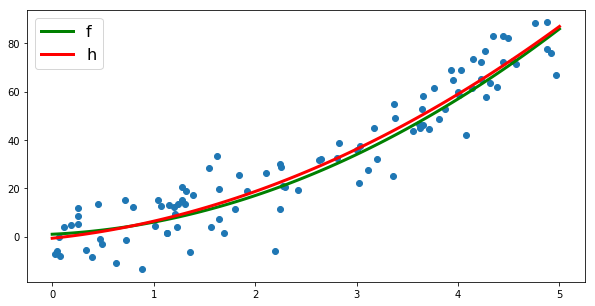

In [6]:
plot_data_and_two_curves(f, compute_sum_of_squares, compute_theta=compute_theta_sklearn, n=100)